# **1.0 Data Importing and Cleaning**

## **1.1 Import Necessary Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import folium
from folium.plugins import HeatMap
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

## **1.2 Load Dataset**

In [2]:
df = pd.read_csv("kc_house_data.csv")

## **1.3 Inspect the Data Frame**



In [3]:
#Print all the columns exist
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
#Get concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
#Get the number of rows and columns of the dataset (rows,columns)
df.shape

(21613, 21)

In [6]:
# Display the first 5 rows of the dataframe
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
#Check the dispersion and shape of the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## **1.4 Finding Any Missing Values**

In [8]:
# Check for missing values
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


## **1.5 Finding Any Duplicates**

In [9]:
# Check for duplicates
print(df.duplicated().sum())

0


# **2.0 Data Manipulating**

## **2.1 Create New Features**

In [10]:
# Create new features price per square foot
df['price_per_sqft'] = df['price'] / df['sqft_living']
df['age'] = 2024 - df['yr_built']
df['renovated'] = np.where(df['yr_renovated'] > 0, 1, 0)

## **2.2 Drop Column**

In [11]:
# Drop columns that won't be used
df = df.drop(columns=['id', 'date', 'yr_renovated'])

# **3.0 Exploratory Data Analysis**


## **3.1 Histogram**

**Checking for distribution**

C:\Users\User\AppData\Local\Temp\ipykernel_4120\2431640597.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['No Renovation', 'Renovated'])


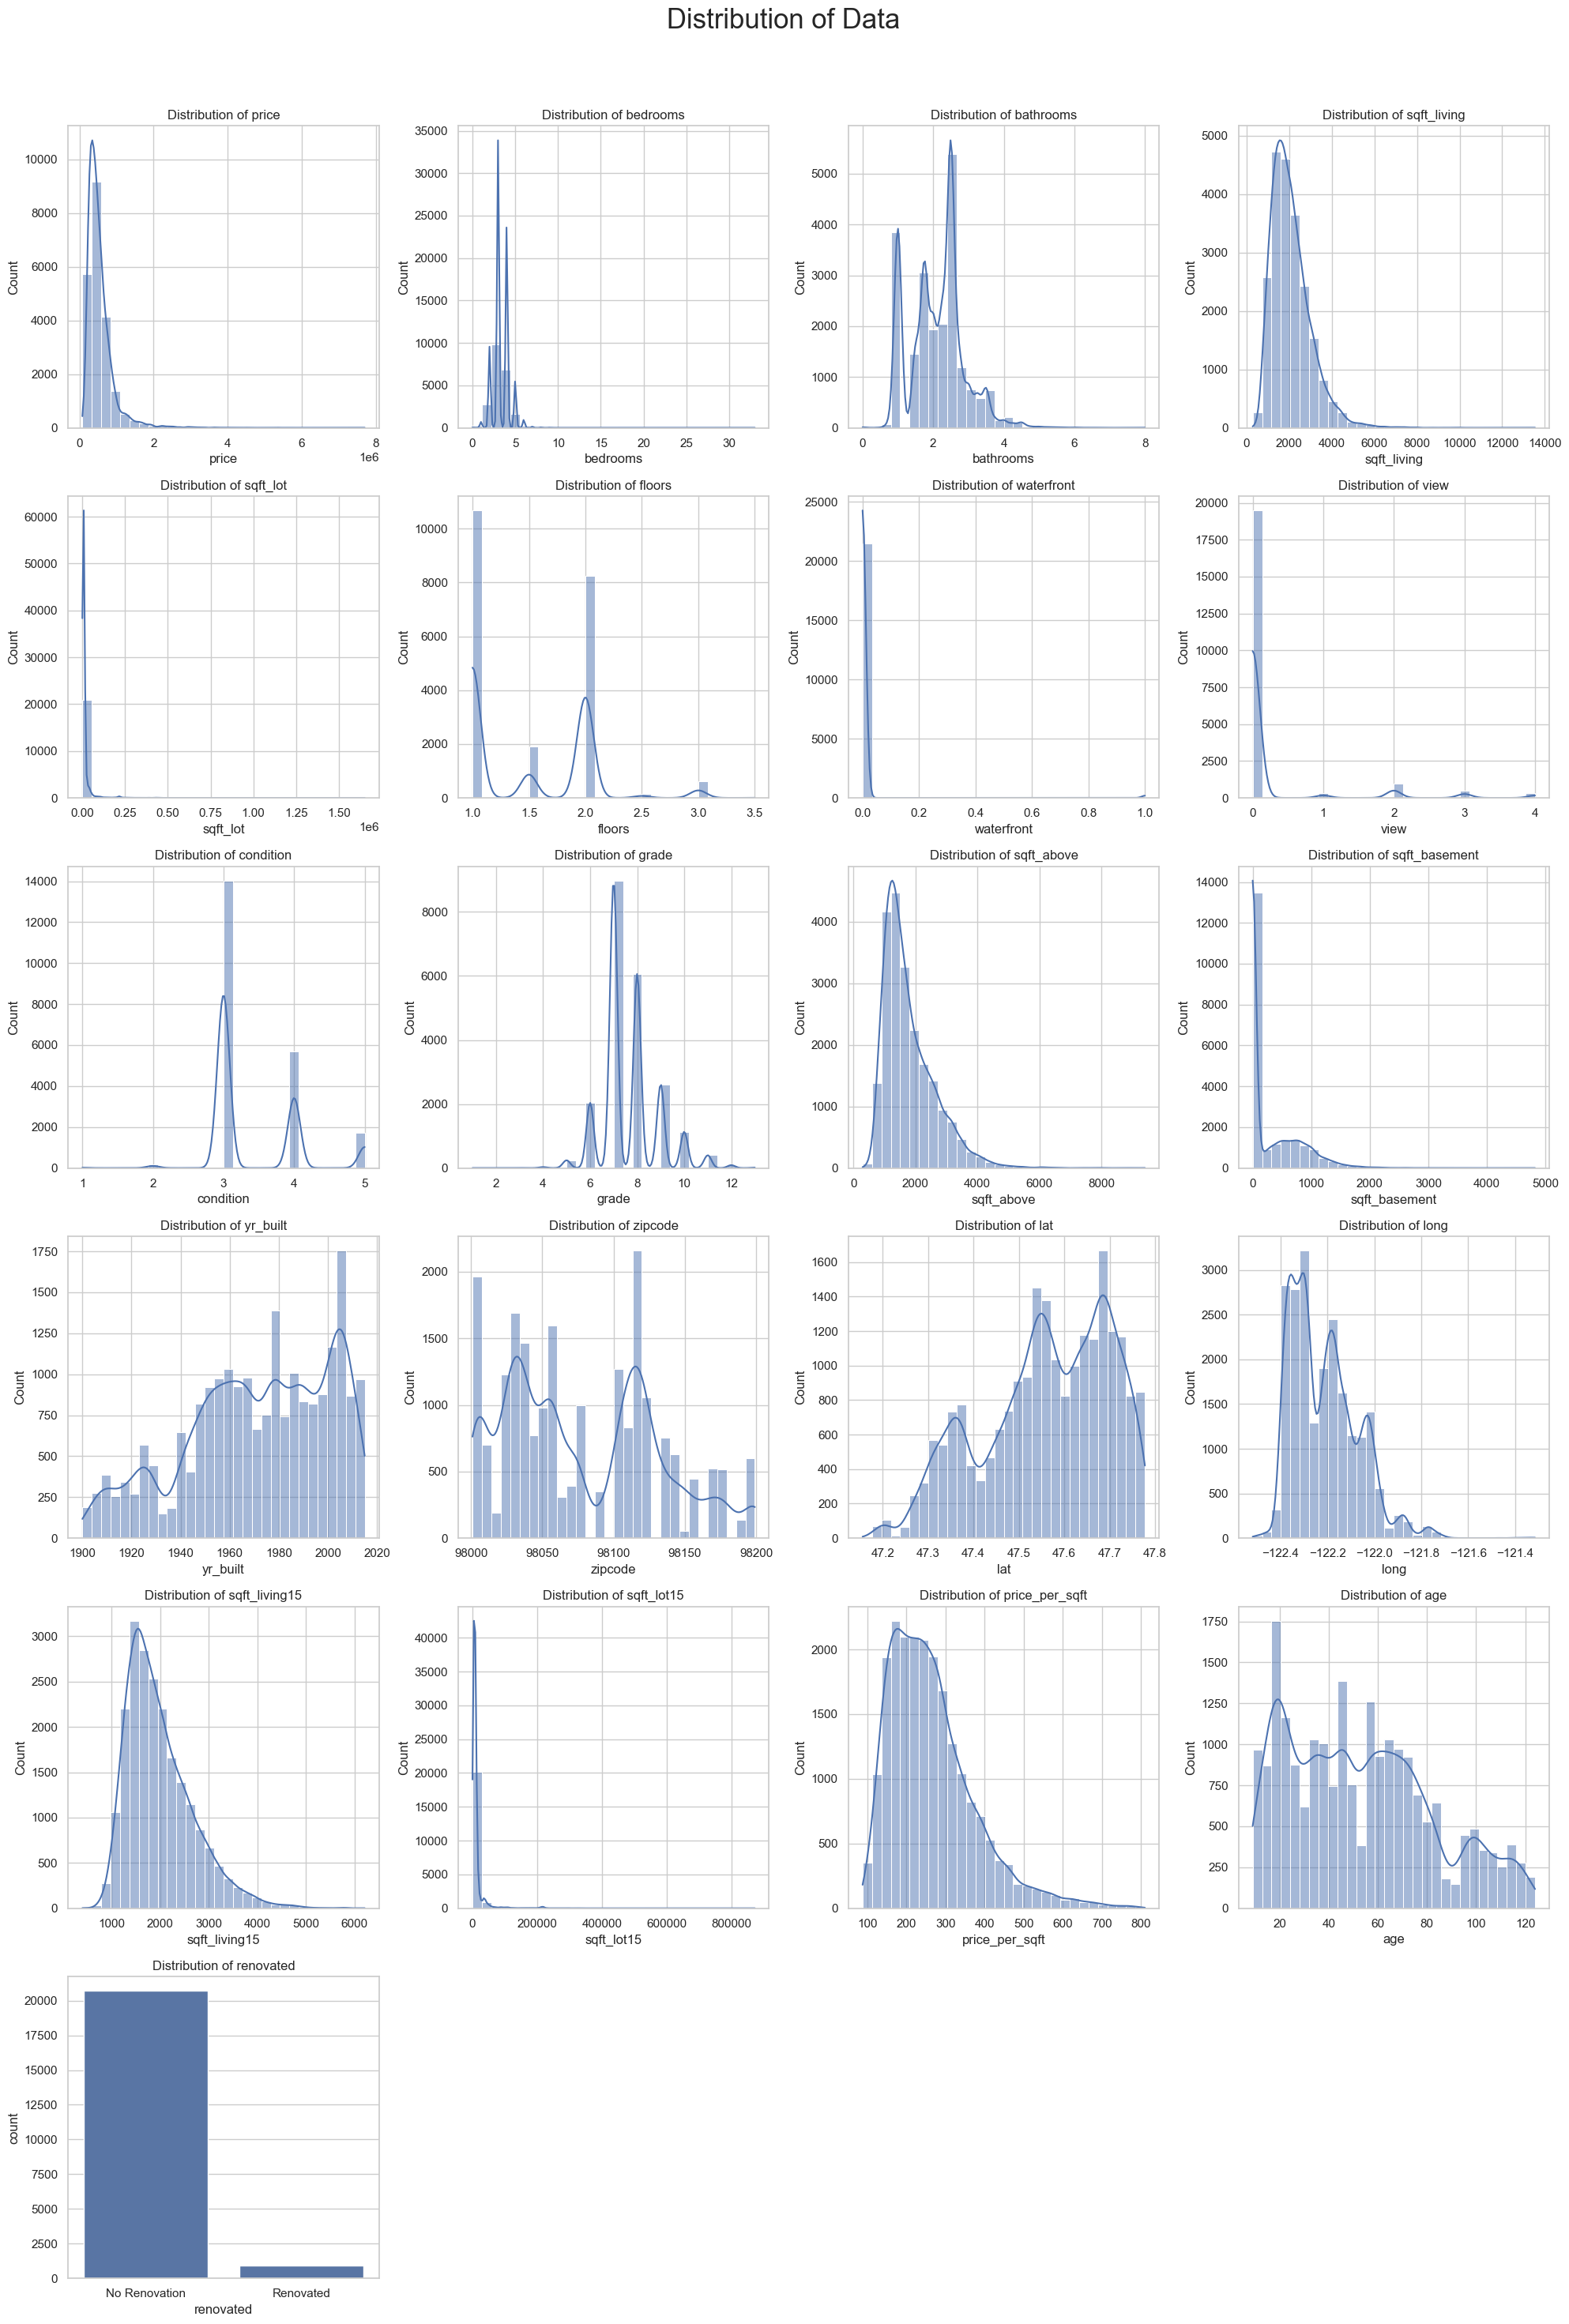

In [12]:
sns.set(style="whitegrid")

num_cols = len(df.columns)

ncols = 4
nrows = int(np.ceil(num_cols / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5*nrows))

axes = axes.flatten()

# Loop through each column and plot its distribution
for i, col in enumerate(df.columns):
    if col == 'renovated':
        sns.countplot(x=df[col], ax=axes[i])
        axes[i].set_xticklabels(['No Renovation', 'Renovated'])
    else:
        sns.histplot(df[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Distribution of Data', fontsize=25)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## **3.2 Boxplot**

**Checking for outliers**

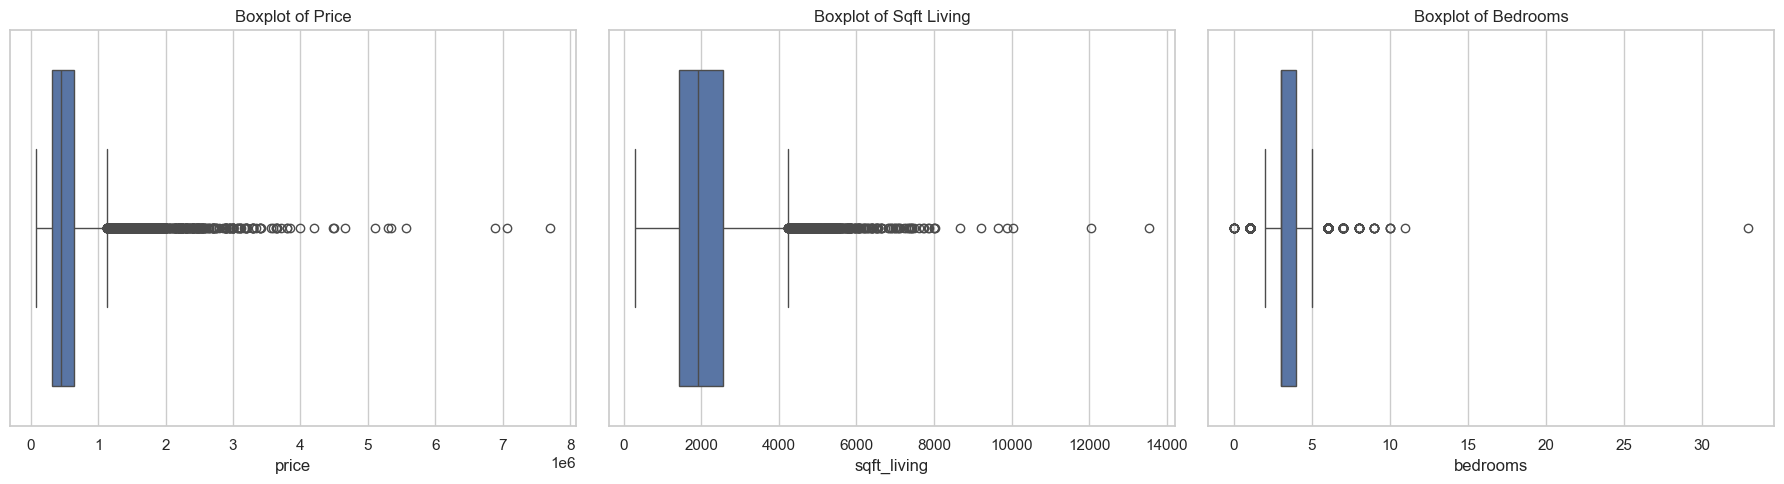

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Boxplot for price
sns.boxplot(x=df['price'], ax=axes[0])
axes[0].set_title('Boxplot of Price')

# Boxplot for sqft_living
sns.boxplot(x=df['sqft_living'], ax=axes[1])
axes[1].set_title('Boxplot of Sqft Living')

# Boxplot for bedrooms
sns.boxplot(x=df['bedrooms'], ax=axes[2])
axes[2].set_title('Boxplot of Bedrooms')

plt.tight_layout()
plt.show()

##**3.3 Conditional Boxplot**

**Explore relationships between features and price**

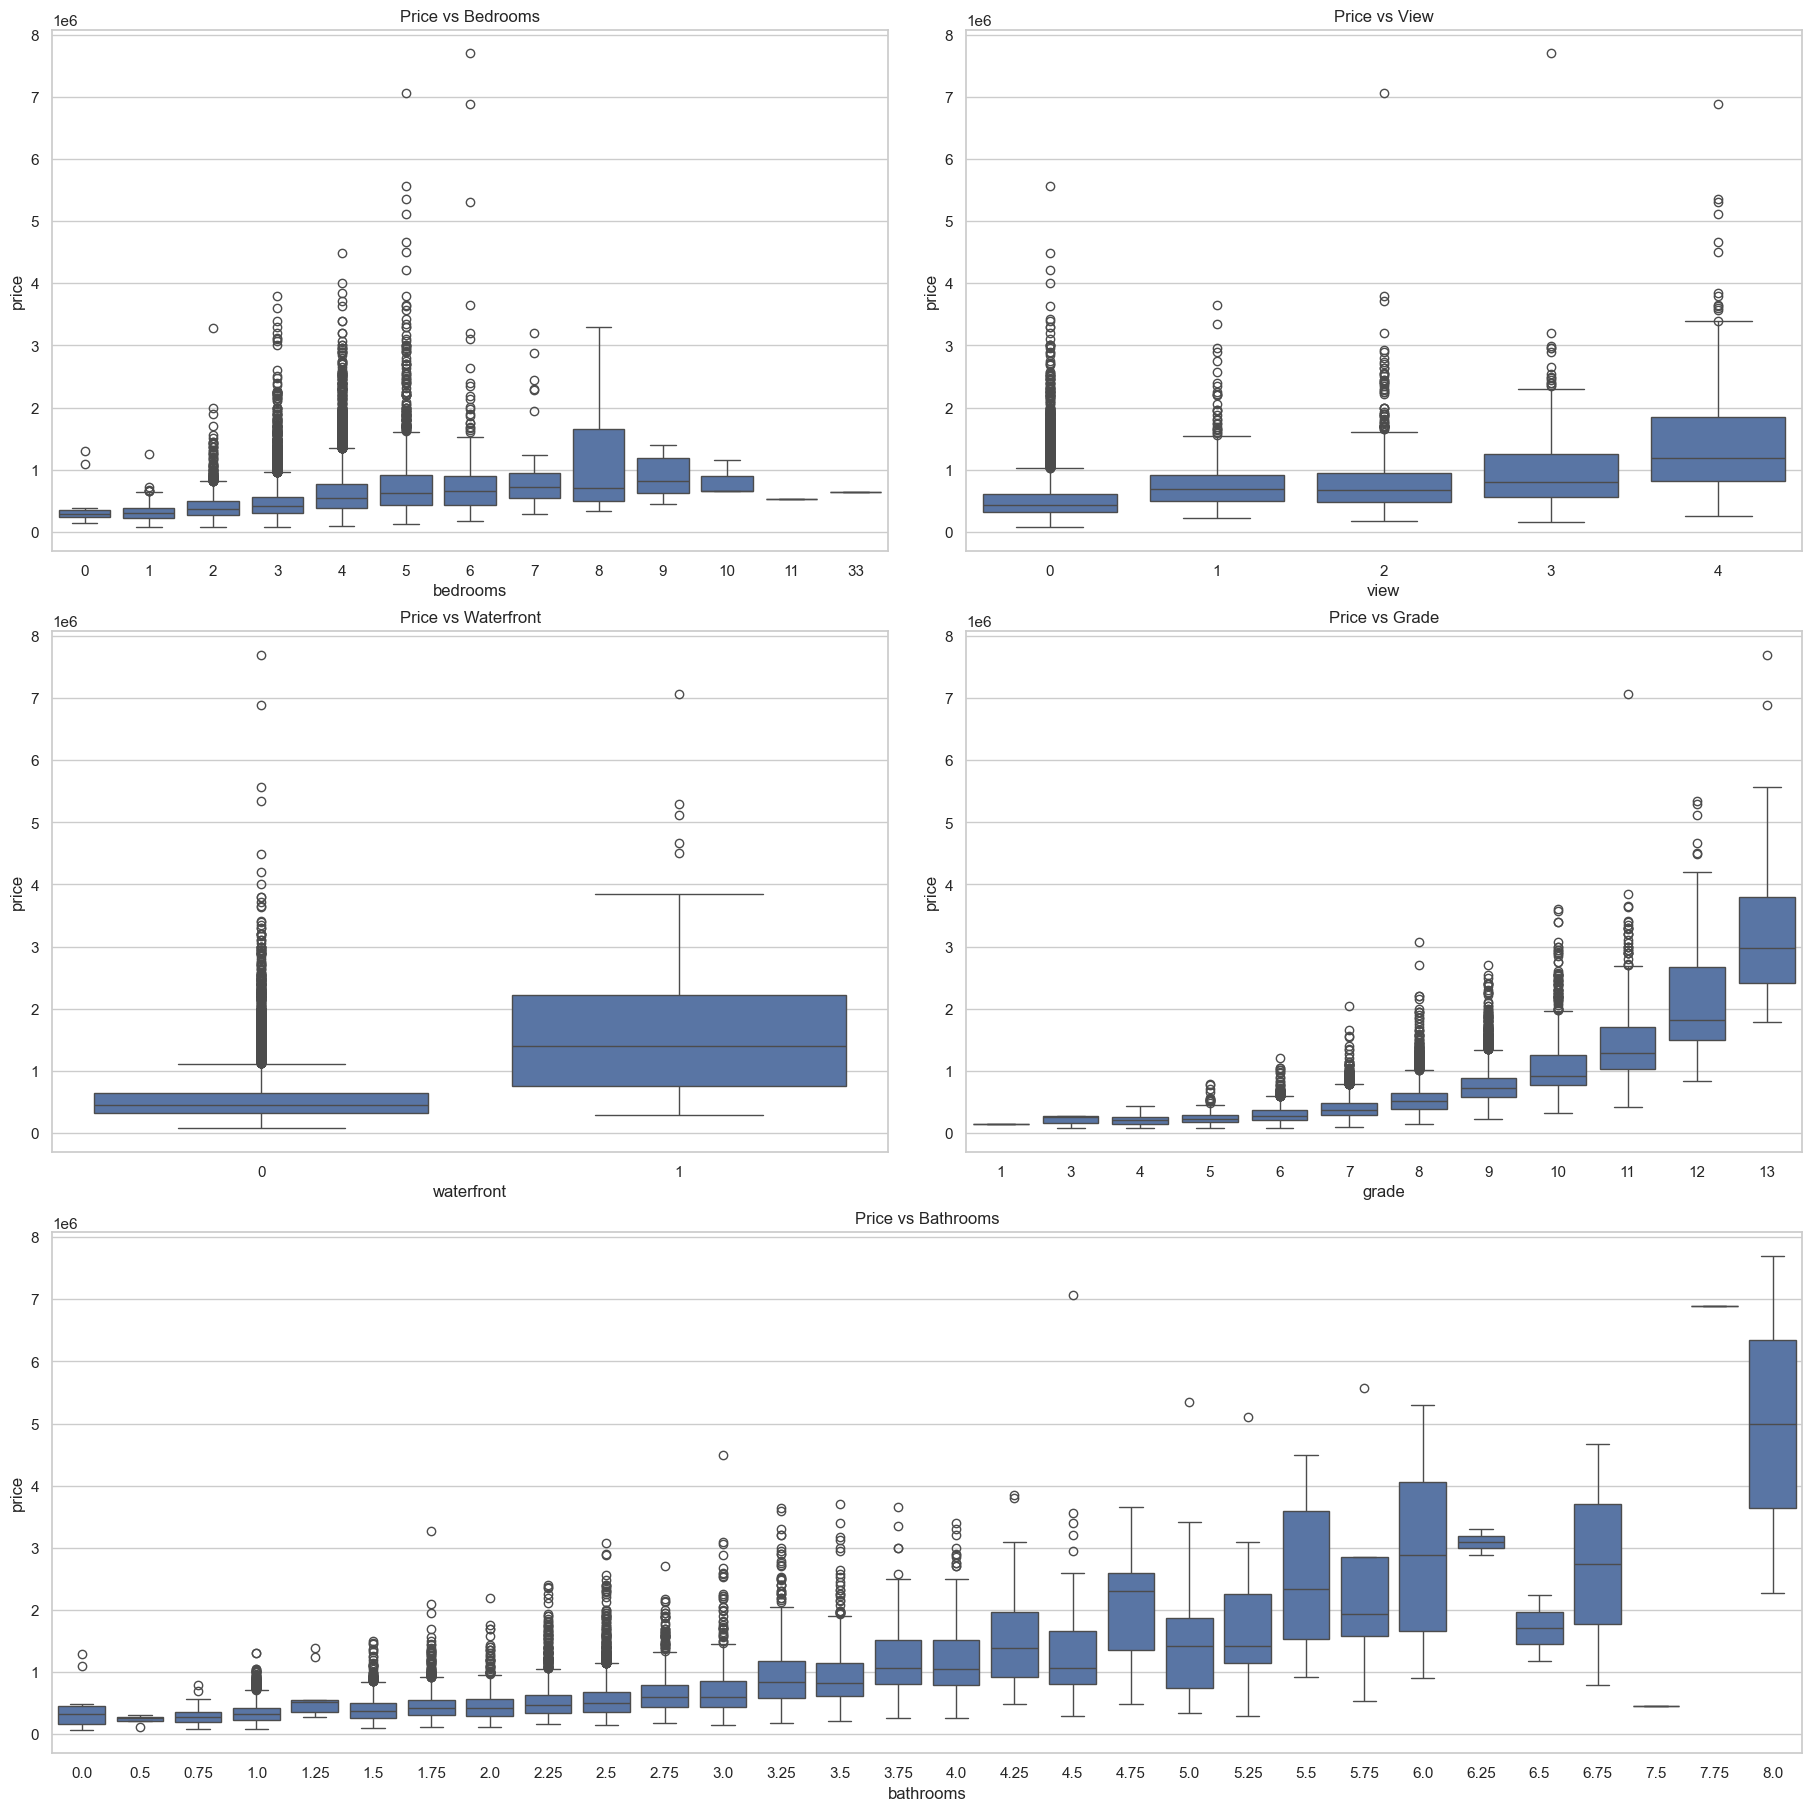

In [14]:
# Create a gridspec layout
fig = plt.figure(constrained_layout=True, figsize=(18, 18))
spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)

# Boxplot for price vs bedrooms
ax1 = fig.add_subplot(spec[0, 0])
sns.boxplot(x=df['bedrooms'], y=df['price'], ax=ax1)
ax1.set_title('Price vs Bedrooms')

# Boxplot for price vs view
ax2 = fig.add_subplot(spec[0, 1])
sns.boxplot(x=df['view'], y=df['price'], ax=ax2)
ax2.set_title('Price vs View')

# Boxplot for price vs waterfront
ax3 = fig.add_subplot(spec[1, 0])
sns.boxplot(x=df['waterfront'], y=df['price'], ax=ax3)
ax3.set_title('Price vs Waterfront')

# Boxplot for price vs grade
ax4 = fig.add_subplot(spec[1, 1])
sns.boxplot(x=df['grade'], y=df['price'], ax=ax4)
ax4.set_title('Price vs Grade')

# Boxplot for price vs bathrooms, spanning entire row
ax5 = fig.add_subplot(spec[2, :])
sns.boxplot(x=df['bathrooms'], y=df['price'], ax=ax5)
ax5.set_title('Price vs Bathrooms')

# Adjust layout to prevent overlap
plt.show()

## **3.4 Correlation Matrix Heatmap**

**Checking for correleation between variables**

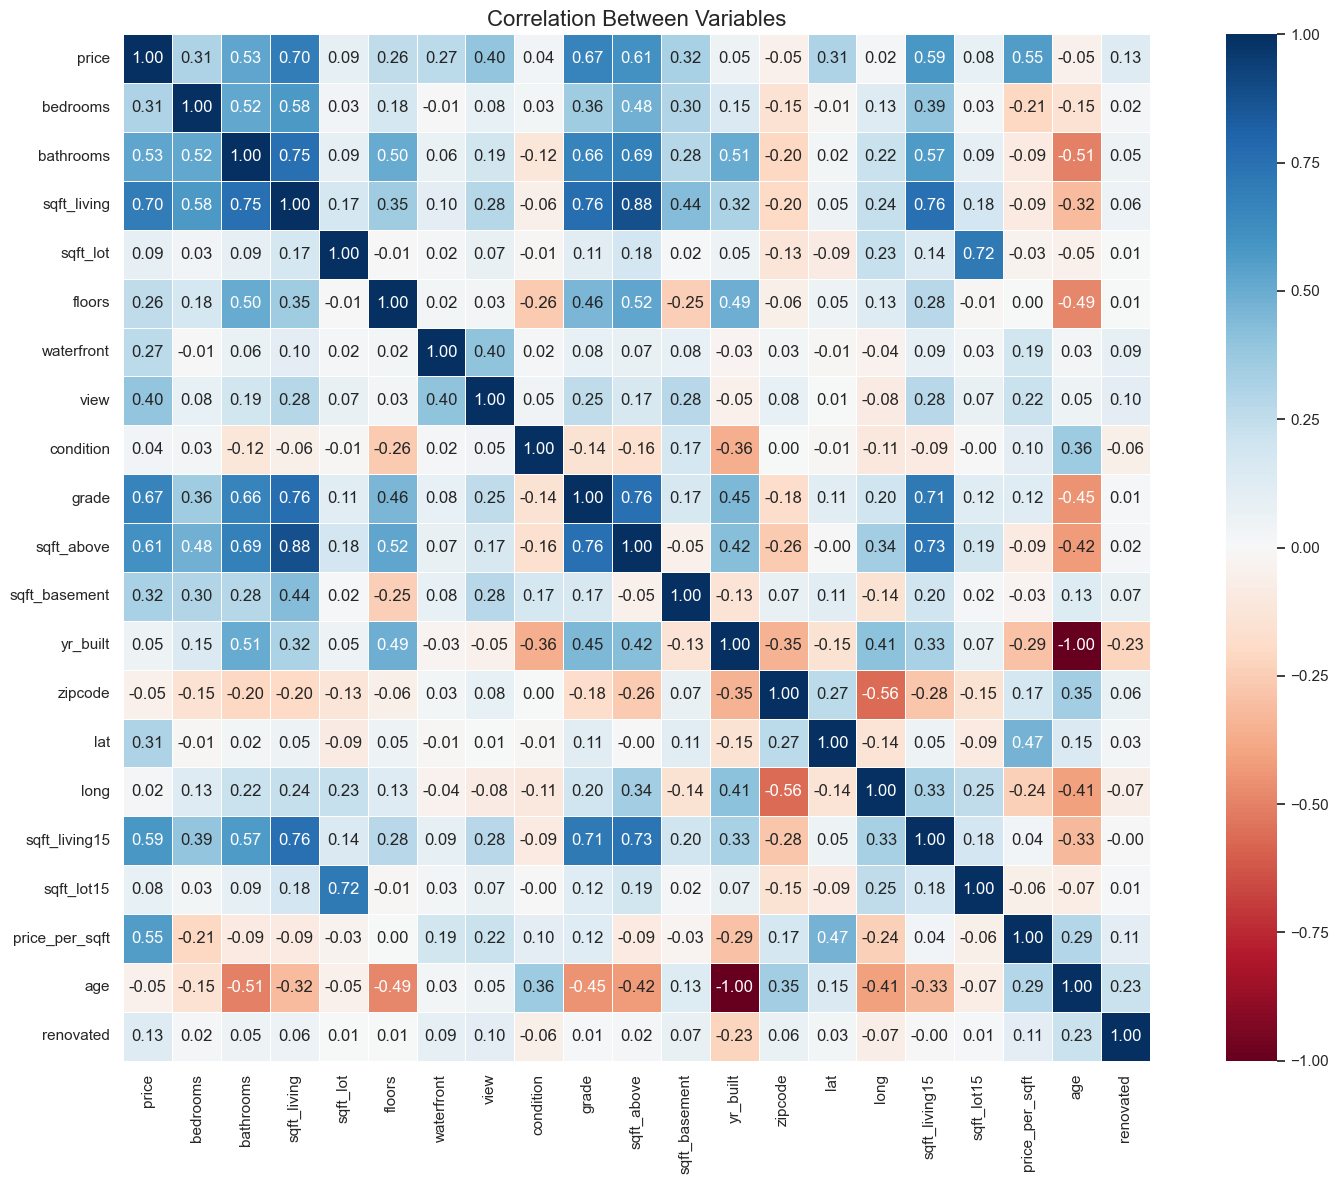

In [15]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu', square=True, linewidths=0.5)

# Add title to the heatmap
plt.title('Correlation Between Variables', fontsize=16)
plt.tight_layout()
plt.show()

**Explore relationships between location (latitude and longitude) and price**


In [16]:
# Define function to generate a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

# Create a copy of the DataFrame
df_copy = df.copy()

# Generate a basemap
basemap = generateBaseMap()

# Add CartoDB Positron tile layer
folium.TileLayer('cartodbpositron').add_to(basemap)

# Create a feature group for markers
s = folium.FeatureGroup(name='icon').add_to(basemap)

# Add a marker for the house with the highest price
maxpr = df.loc[df['price'].idxmax()]
folium.Marker([maxpr['lat'], maxpr['long']], popup='Highest Price: $' + str(format(maxpr['price'], '.0f')),
              icon=folium.Icon(color='green')).add_to(s)

# Add HeatMap based on price with 'YlOrRd' colormap and increased radius
HeatMap(data=df_copy[['lat', 'long', 'price']].values.tolist(), radius=12, max_zoom=13, name='Heat Map', gradient={0.4: 'blue', 0.65: 'green', 1: 'red'}).add_to(basemap)

# Add layer control to toggle layers
folium.LayerControl(collapsed=False).add_to(basemap)

# Show the basemap
basemap

#4.0 Hypothesis Testing




### **4.1 Hypothesis 1: Does the number of bedrooms affect the price?**

In [17]:
model = ols('price ~ bedrooms', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2271.
Date:                Mon, 03 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:59:45   Log-Likelihood:            -3.0652e+05
No. Observations:               21613   AIC:                         6.131e+05
Df Residuals:                   21611   BIC:                         6.131e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.298e+05   8931.866     14.533      0.0

### **4.2 Hypothesis 2: Does having a waterfront view affect the price?**

In [18]:
model = ols('price ~ waterfront', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     1650.
Date:                Mon, 03 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:59:45   Log-Likelihood:            -3.0681e+05
No. Observations:               21613   AIC:                         6.136e+05
Df Residuals:                   21611   BIC:                         6.136e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.316e+05   2416.194    220.000      0.0

### **4.3 Hypothesis 3: Does the year built affect the price?**


In [19]:
model = ols('price ~ age', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     63.23
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           1.93e-15
Time:                        17:59:45   Log-Likelihood:            -3.0757e+05
No. Observations:               21613   AIC:                         6.151e+05
Df Residuals:                   21611   BIC:                         6.152e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.759e+05   5143.931    111.950      0.0

# **5.0 Predictive Analysis**

## **5.1 Feature Selection and Data Splitting**

In [20]:
# Feature selection
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'zipcode', 'age', 'price_per_sqft', 'renovated', 'grade', 'waterfront', 'view']]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **5.2 Model Training**

In [21]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [22]:
# Decision Tree Model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [23]:
# Random Forest Model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [24]:
# Gradient Boosting Model
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

## **5.3 Model Selection**

In [25]:
# Model Evaluation
best_model_name = None
best_model_mse = float('inf')
best_model_r2 = float('-inf')

models = {
    'Linear Regression': (y_pred_lr, lr),
    'Decision Tree': (y_pred_dt, dt),
    'Random Forest': (y_pred_rf, rf),
    'Gradient Boosting': (y_pred_gb, gb)
}

for name, (y_pred, model) in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} MSE: {mse}")
    print(f"{name} R2: {r2}")
    print()

    # Update the best model if the current model has lower MSE or higher R2
    if mse < best_model_mse or r2 > best_model_r2:
        best_model_name = name
        best_model_mse = mse
        best_model_r2 = r2

print(f"Best Model: {best_model_name}")
print(f"MSE: {best_model_mse}")
print(f"R2: {best_model_r2}")

Linear Regression MSE: 17876299156.441235
Linear Regression R2: 0.8817522957764253

Decision Tree MSE: 2548617002.3927827
Decision Tree R2: 0.983141470902856

Random Forest MSE: 834095613.9980112
Random Forest R2: 0.9944826448363234

Gradient Boosting MSE: 535176554.70469683
Gradient Boosting R2: 0.9964599272816874

Best Model: Gradient Boosting
MSE: 535176554.70469683
R2: 0.9964599272816874


## **5.4 Cross Validation and Hyperparameter Tuning**

In [26]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [400, 500, 600],
    'learning_rate': [0.05, 0.1, 0.5],
    'max_depth': [4, 5, 6],
    'subsample': [0.8, 0.9, 1.0]
}

In [27]:
# Create Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


KeyboardInterrupt: 

In [ ]:
# Get the best model from grid search
best_gb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best_gb = best_gb_model.predict(X_test)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)

print("Best Gradient Boosting Model:")
print("Best Parameters:", grid_search.best_params_)
print("MSE:", mse_best_gb)
print("R2:", r2_best_gb)

After performing hyperparameter tuning by using GridSearchCV, the best paramters for the **Gradient Boosting** model is learning_rate = 0.1, max_depth = 4, n_estimators = 600, and subsample = 0.9

In [ ]:
# Update models dictionary with the best Gradient Boosting model
models['Gradient Boosting'] = (y_pred_best_gb, best_gb_model)

# **6.0 Reporting**

## **6.1 Save the cleaned data**

In [ ]:
# Save the cleaned data
df.to_csv('cleaned_housing_data.csv', index=False)

## **6.2 Model Performance Visualization**

In [ ]:
# Visualization of Model Performance
plt.figure(figsize=(16, 12))

# Actual vs Predicted Prices for each model
for i, (name, (y_pred, model)) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    plt.title(f'Actual vs Predicted Prices: {name}')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()

## **6.3 Model Performance Metrics**

In [ ]:
# Save the model performance metrics
metrics = {
    'Model': [],
    'MSE': [],
    'R2': []
}

for name, (y_pred, model) in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics['Model'].append(name)
    metrics['MSE'].append(mse)
    metrics['R2'].append(r2)

metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv('model_performance_metrics.csv', index=False)

# Display the metrics
print(metrics_df)

- **Mean Squared Error (MSE)**: This metric measures the average of the squares of the errors, i.e., the average squared difference between the predicted and actual values. A lower MSE indicates better model performance.
- **$R^2$ Score**: This metric represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher $R^2$ score indicates a better fit of the model to the data.

## **6.3 Analysis**
Based on the model performance metrics,
- The **Gradient Boosting** model has the lowest MSE of $5.120573 \times 10^{8}$. A lower MSE means that the model's predictions are closer to the actual values, meaning it has better accuracy.
- The **Gradient Boosting** model has the highest $R^2$ value of 0.996613. An $R^2$ value closer to 1 means the model explains a higher proportion to the variance, indicating better performance.

## **6.4 Conclusion**
The **Gradient Boosting** model is the most suitable model for predicting house prices due to its lowest MSE and highest $R^2$ value.

In [ ]:
import joblib

joblib.dump(models['Gradient Boosting'], 'gb_best.pkl')